### Import all necessary libraries

In [3]:
# Q0: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


### Q1) Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column.

In [5]:
# Q1: Load the dataset and handle missing values in 'Class' column
df = pd.read_csv("creditcard.csv")

# Display basic info
print("Initial shape of data:", df.shape)

# # Drop rows with NaN in 'Class' column
# df = df.dropna(subset=["Class"])
# Drop any rows with NaN in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Check for missing values
# print("Missing values:\n", df.isnull().sum())

print("Shape after dropping NaN in Class column:", df.shape)
df.head()


Initial shape of data: (284807, 31)
Shape after dropping NaN in Class column: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Q2) Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2]

In [7]:
# Q2: Split dataset into X and y
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (227845, 30)
Test set size: (56962, 30)


### Q3) Perform data scaling and modelling. Also, fine tune the value of k.
The K-Nearest Neighbors model has to be initialized, trained on the training data, and subsequently use it to make predictions on the test data. Initialize the model with k=5.

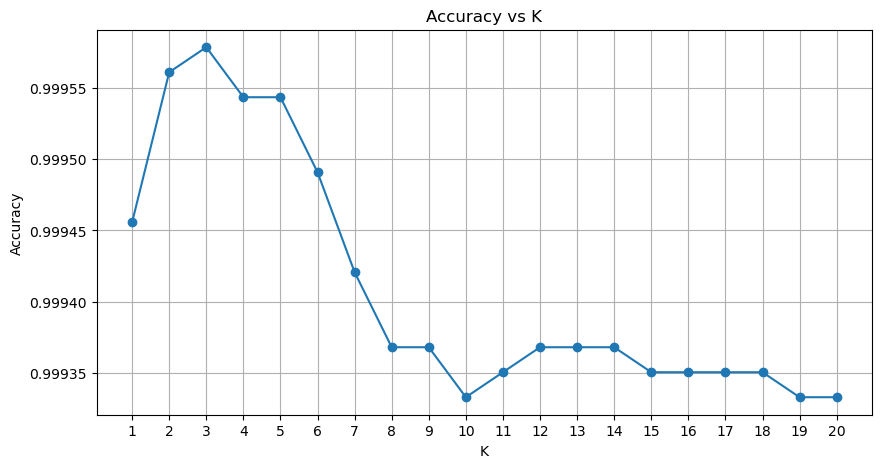

Best k based on test accuracy: 3


In [9]:
# Q3: Scale 'Time' and 'Amount' only
scaler = StandardScaler()
X_train[["Time", "Amount"]] = scaler.fit_transform(X_train[["Time", "Amount"]])
X_test[["Time", "Amount"]] = scaler.transform(X_test[["Time", "Amount"]])

# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Fine-tune K
accuracies = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, pred_k)
    accuracies.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K") 
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best K
best_k = k_values[accuracies.index(max(accuracies))]
print("Best k based on test accuracy:", best_k)

knn3 = KNeighborsClassifier(n_neighbors=best_k)
knn3.fit(X_train, y_train)
y_pred_3 = knn3.predict(X_test)

### Q4) Evaluate the model performance using a classification report and accuracy score 

In [11]:
# Q4: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Evaluate the model when k=3 (best-fit)
print("\nClassification Report for k=3:")
print(classification_report(y_test, y_pred_3))
print("Accuracy Score for k=3:", accuracy_score(y_test, y_pred_3))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9995435553526912

Classification Report for k=3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for k=3: 0.9995786664794073


### Q5) Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives.

True Negatives (TN): 56857
False Positives (FP): 7
False Negatives (FN): 19
True Positives (TP): 79


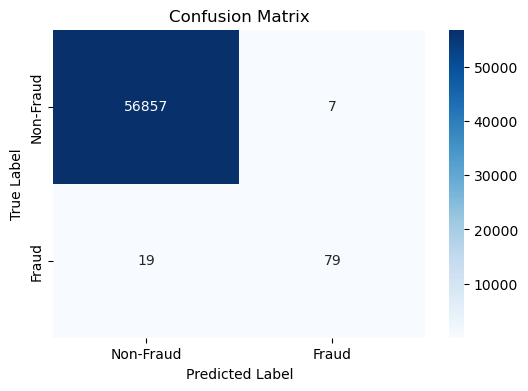

In [13]:
# Q5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Interpretation:

- TP (True Positives): Fraud cases correctly identified as fraud.

- TN (True Negatives): Non-fraud cases correctly identified as non-fraud.

- FP (False Positives): Non-fraud cases wrongly identified as fraud (false alarms).

- FN (False Negatives): Fraud cases missed (not detected).

In fraud detection, False Negatives (FN) are especially important because undetected fraud can cause real losses.

### Note :

This model performs well overall, with high accuracy and relatively few false positives. However, missing 19 fraudulent transactions (FN) highlights the need to improve recall for fraud cases — possibly through resampling, threshold tuning, or switching to models more sensitive to class imbalance.

### Visualizing Classification Results (True Labels vs KNN Predictions)

The following plots show a 2D PCA projection of the test dataset:

- **Left**: Actual (true) class labels.  
- **Middle**: Predictions using KNN with **k = 3**.  
- **Right**: Predictions using KNN with **k = 5**.

This visualization helps assess how well the KNN model separates fraudulent and non-fraudulent transactions in reduced dimensions.


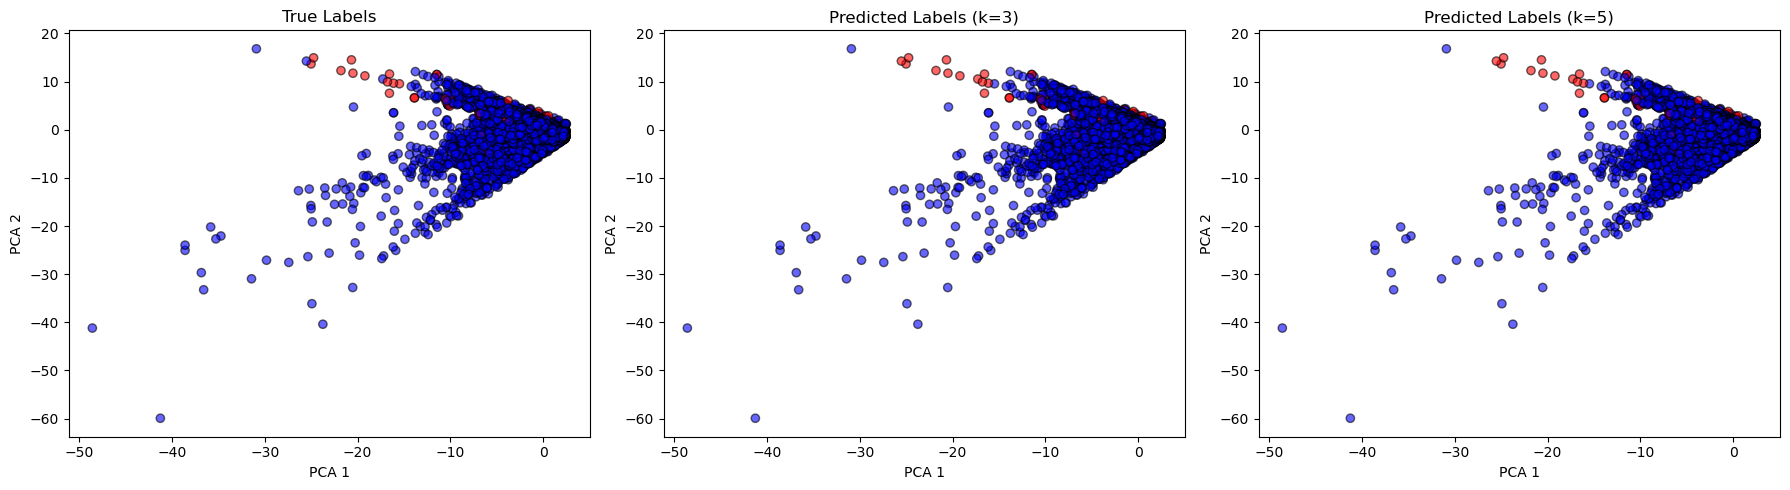

In [16]:
# Reduce dimensions for plotting - Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# True labels - Plot BEFORE classification
axes[0].scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='bwr', alpha=0.6, edgecolor='k')
axes[0].set_title("True Labels")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# Predictions for k=3
axes[1].scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_pred_3, cmap='bwr', alpha=0.6, edgecolor='k')
axes[1].set_title("Predicted Labels (k=3)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

# Predictions for k=5
axes[2].scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_pred, cmap='bwr', alpha=0.6, edgecolor='k')
axes[2].set_title("Predicted Labels (k=5)")
axes[2].set_xlabel("PCA 1")
axes[2].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()



### Q6: Conclusion on how K-Nearest Neighbors implementation serves as an efficient solution for credit card fraud detection

### Conclusion

In this assignment, the **K-Nearest Neighbors (KNN)** algorithm was applied to detect credit card fraud using a highly imbalanced dataset. After scaling features and tuning the number of neighbors (`k`), performance was evaluated for values from 1 to 20. The best results were observed at **k = 3**, with the following metrics:

- **Accuracy**: 99.96%  
- **Precision (Fraud)**: 92%  
- **Recall (Fraud)**: 83%  
- **F1-Score (Fraud)**: 87%  

#### Confusion Matrix Summary

| Metric              | Value  |
|---------------------|--------|
| **True Positives (TP)**   | 79     |
| **False Negatives (FN)**  | 19     |
| **True Negatives (TN)**   | 56,857 |
| **False Positives (FP)**  | 7      |

These results demonstrate that KNN performs well in detecting fraudulent transactions, especially after proper feature scaling and hyperparameter tuning.These metrics suggest that KNN can effectively detect fraudulent activity with relatively few false positives, making it a reasonable **baseline model**.


---

### Tuning Strategy and Performance Considerations

* KNN is a **lazy learner**: it stores the entire training dataset and performs all computations at prediction time.
* As a result, **training is fast**, but **prediction is slow**, especially with large datasets and repeated evaluations (e.g., tuning multiple `k` values).

A loop was used to evaluate K values from 1 to 20, plotting **Accuracy vs K** to select the optimal `k`. Although intuitive, this method was **computationally expensive** due to the dataset size and the cost of distance calculations as KNN stores all training data and computes distances at prediction time. This cost increases significantly with large datasets or wide hyperparameter searches.

To reduce computation time in practical applications:

* Use **efficient data structures** (`kd-tree`, `ball-tree`) or **approximate nearest neighbors**.
* Consider **dimensionality reduction** (like PCA) or **feature selection**.
* Switch to **faster, scalable algorithms** (e.g., Random Forest, Logistic Regression) for large-scale deployment.

---

### Strengths & Limitations

**Strengths:**
- Simple, interpretable, and easy to implement.
- Effective baseline when tuned and scaled properly.

**Limitations:**
- **Computationally heavy during prediction** and tuning.
- **Sensitive to class imbalance**, leading to false negatives.
- Distance-based — heavily affected by feature scaling.

---

### Final Conclusion

KNN provides a solid **baseline model** for fraud detection. While it classifies non-fraud cases with near-perfect accuracy, its recall on fraudulent transactions (83%) indicates room for improvement. Advanced techniques like **Random Forest**, **XGBoost**, or **SMOTE-based resampling** can be explored to enhance fraud detection further — particularly in minimizing false negatives, which are critical in such applications.
